<a href="https://colab.research.google.com/github/jo-soobin/python-study/blob/main/07_plotting_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. 그래프와 시각화

## 기본 설정

In [ ]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)
np.random.seed(123)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(10, 6))  # 그림 크기 설정

## matplotlib.pyplot의 시각화 도구 API

### `matplotlib.pyplot.plot()`
- 2차원 그래프를 그리는 함수이다.
- y축 좌표들의 리스트 또는 어레이만 인자로 넣어줄 때이다. x축 좌표는 해당 값들의 인덱스로 사용됨
- [참고](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

- 3D도 가능
```
https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html
```

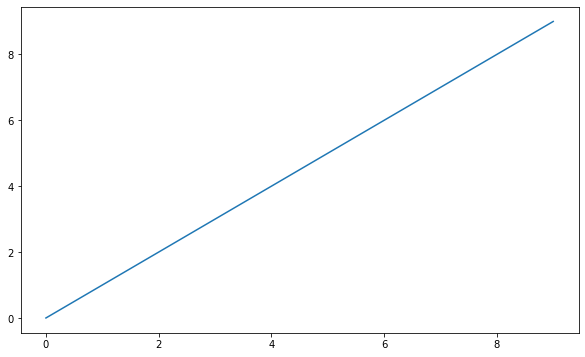

In [ ]:
data = np.arange(10)
plt.plot(data)

### `Figure` 객체와 서브플롯(subplot)

- 모든 그래프는 `Figure` 객체 내에 존재
- `matplotlib.pyplot.figure()` 함수에 의해 생성

__참고:__ 
- 주피터 노트북을 사용시  `matplotlib.pyplot.figure()`, `matplotlib.pyplot.add_subplot()` 등 그래프를 그래프화 관련된 함수들은 모두 같은 셀에서 실행되어야 한다. 

In [ ]:
fig = plt.figure()

<Figure size 720x432 with 0 Axes>

In [ ]:
fig.add_subplot(2,2,1)


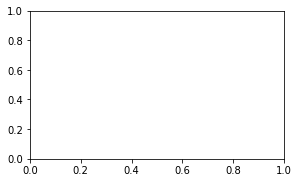

In [ ]:
fig = plt.figure()
fig.add_subplot(2,2,1)

- 서브플롯(subplot)
    - `Figure` 객체 내에 그래프를 그리기 위해 서브플롯(subplot)을 지정
    - `add_subplot()` 함수를 이용하여 지정된 `Figure` 객체안에 그래프를 그릴 공간을 만들어 보자

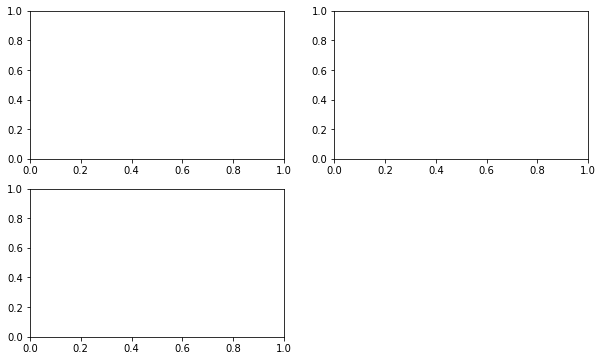

In [ ]:
fig = plt.figure()
fig.add_subplot(2,2,1)
fig.add_subplot(2,2,2)
fig.add_subplot(2,2,3)

- subplot 추가

#### 그래프 삽입
- `matplotlib.pyplot.plot()`
- `<object>.plot()`

##### 방법 1: `matplotlib.pyplot.plot()`

- 마지막에 선언된 서브플롯에 그래프를 그린다.
- 예) 누적합을 나타내는 그래프를 그려보자

In [ ]:
import numpy as np
data = np.random.randn(40).cumsum() #누적합 생성

In [ ]:
data

array([-1.0856, -0.0883,  0.1947, -1.3116, -1.8902, -0.2388, -2.6654,
       -3.0944, -1.8284, -2.6952, -3.374 , -3.4688, -1.9774, -2.6163,
       -3.0603, -3.4946, -1.2887,  0.8981,  1.9022,  2.2884,  3.0257,
        4.5165,  3.5806,  4.7565,  3.5026,  2.8648,  3.7719,  2.3432,
        2.2032,  1.3414,  1.0858, -1.7128, -3.4843, -4.1842, -3.2567,
       -3.4304, -3.4275, -2.7393, -3.6188, -3.3352])

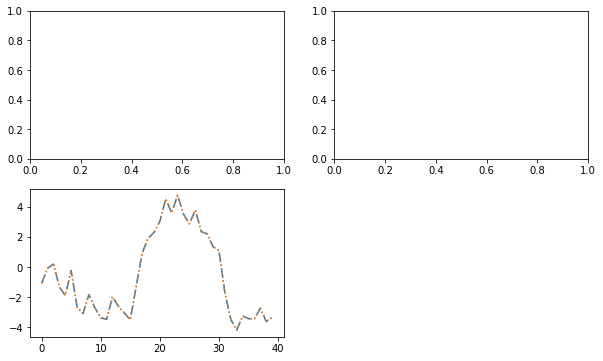

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1) # 2x2 인 subplot을 만들어 준다. 
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

# 위치 지정x 마지막 subplot에 그려진다. 
plt.plot(data, "-.")
plt.plot(data, ":")

##### 방식 2: `객체명.plot()` 함수 활용

- 특정 서브플롯에 그래프를 삽입하려면 객체 이름과 함께 `plot()` 함수 등을 호출

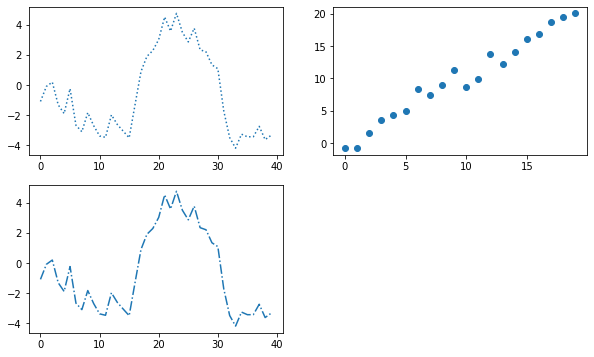

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1) # 2x2 인 subplot을 만들어 준다. 
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

# 위치 지정
ax3.plot(data, "-.") #plt.plot은 마지막 plot 을 의미한다. 
ax1.plot(data, ":") # (2,2,1) 의 위치에 plot 출력한다.
ax2.scatter(np.arange(20), np.arange(20)+np.random.randn(20))  # (2,2,2) 의 위치에 scatter를 출력한다.

plt.show()

#### 서브플롯 관리

- `matplotlib.pyplot.subplots()`
    - 여러 개의 서브플롯을 포함하는 `Figure` 객체를 관리해준다.

- 예) 2x3 크기의 서브플롯을 담은 (2,3) 모양의 넘파이 어레이로 생성.

Figure(720x432)
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2bd2808f90>


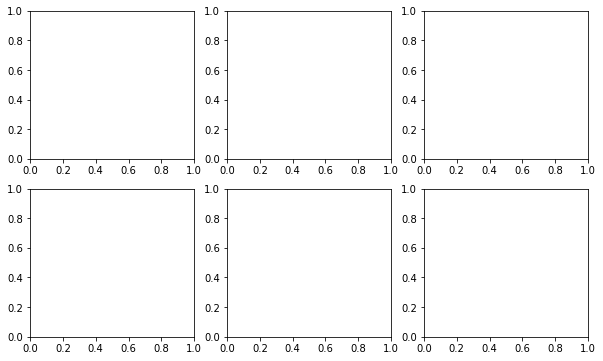

In [ ]:
fig, axes= plt.subplots(2,3)
print(fig)
print(axes)

- `plt.subplots_adjust()` 
    - 각 서브플롯 사이의 여백을 조절
    - 여백의 크기는 그래프의 크기와 숫자에 의존한다.

- 예) 여백이 0인 경우

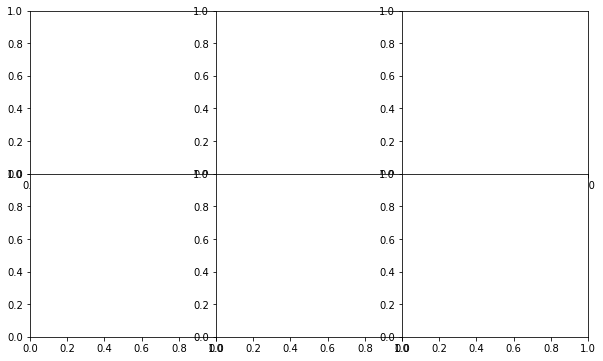

In [ ]:
fig, axes= plt.subplots(2,3)
plt.subplots_adjust(wspace=0, hspace=0)

- 예) 여백이 1인 경우

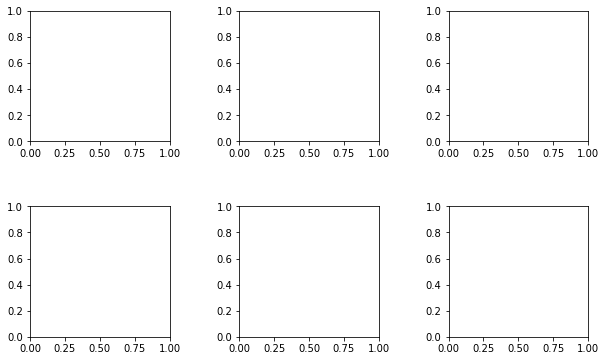

In [ ]:
fig, axes= plt.subplots(2,3)
# plt.subplots_adjust(wspace=0, hspace=1)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

### 색상, 마커, 선 스타일

- 그래프의 속성을 변경하면 스타일이 변경된다.
- 방법 1: 문자열 방식

```python
ax.plot(x, y, 'g--')
```

- 방법 2: 키워드 인자 지정 방식

```python
ax.plot(x, y, linestyle='--', color='g')
```

색상은 RGB 값을 HEX 코드를 이용하여 직접 사용 가능
- [RGB HEX 코드 link](https://www.w3schools.com/colors/colors_rgb.asp)

#### 여러 그래프 하나의 서브플롯에 그리기

- 여러 스타일의 그래프를 하나의 서브플롯에 그려 다양한 정보를 동시에 전달

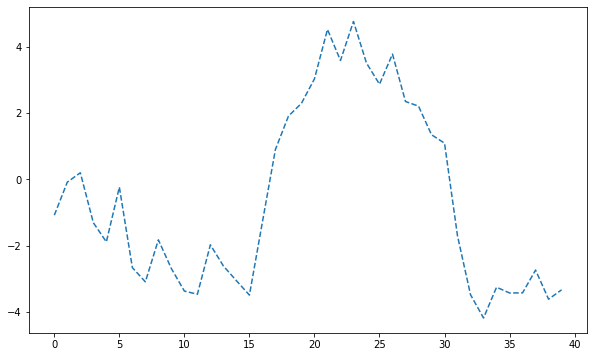

In [ ]:
plt.plot(data, "--")

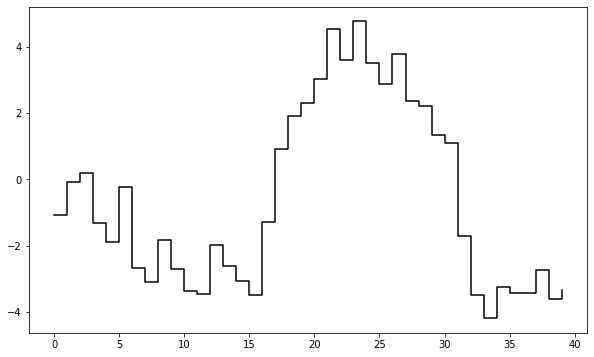

In [ ]:
plt.plot(data, drawstyle="steps-post", color = "k")

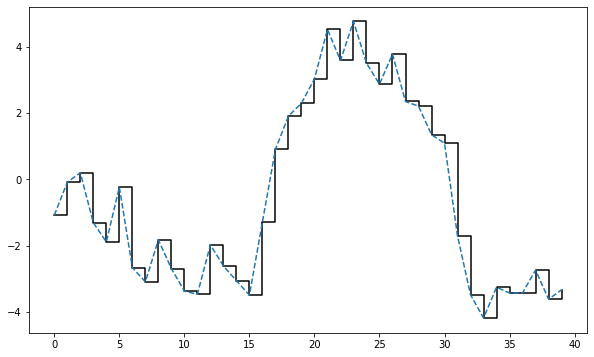

In [ ]:
plt.plot(data, drawstyle="steps-post", color = "k", label = "steps-post")
plt.plot(data, "--", label = "default")

- 범례 표기
    - `plt.legend()` 
    - `loc='best'`: 범례 위지 지정. 기본값은 auto

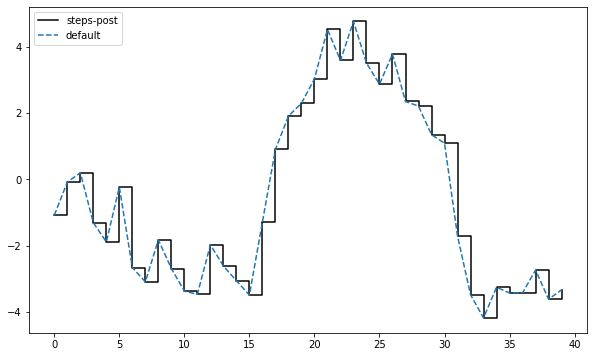

In [ ]:
plt.plot(data, drawstyle="steps-post", color = "k", label = "steps-post")
plt.plot(data, "--", label = "default")
plt.legend(loc="upper left") # 범례지정
plt.show()
# upper left
# upper right

### 눈금과 라벨

#### 이미지 타이틀, 축 이름, 눈금, 눈금 이름 지정

##### 방법 1: 파이플롯 객체의 메서드 활용
- `set_xticks()` 함수: 눈금 지정
- `set_xticklabels()` 함수: 눈금 라벨 지정
- `set_title()` 함수: 그래프 타이틀 지정
- `set_xlabel()` 함수: x축 이름 지정

In [ ]:
data = np.random.randn(1000).cumsum()

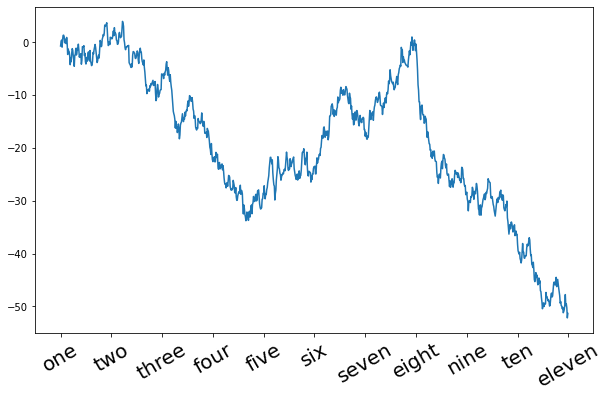

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.plot(data)

ax1.set_xticks(np.arange(0,1001,100))
ax1.set_xticklabels(["one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "ten", "eleven"], 
                    size = 20,
                    rotation = 30)
plt.show()

##### 방법 2: pyplot 모듈의 함수 활용
- `plt.xticks()` 함수: 눈금 및 눈금 라벨 지정
- `plt.title()` 함수: 그래프 타이틀 지정
- `plt.xlabel()` 함수: x축 이름 지정

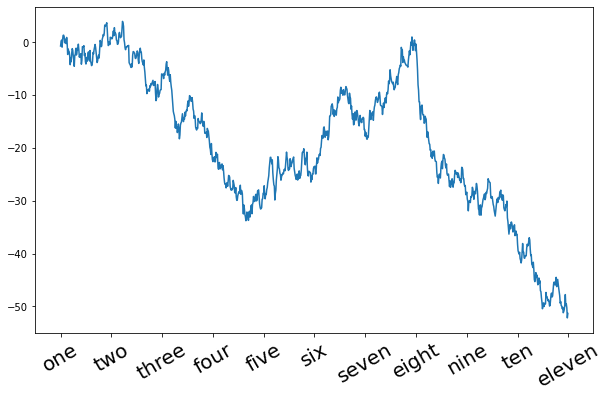

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.plot(data)

plt.xticks(np.arange(0,1001,100), ["one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "ten", "eleven"], 
                    size = 20,
                    rotation = 30)
plt.show()

### 서브플롯에 주석 및 도형 추가하기

#### 주석 추가

설명을 위해 S&P 500 (스탠다드 앤 푸어스, Standard and Poor's 500)의 미국 500대 기업을 포함한 
주식시장지수 데이터로 그래프를 생성하고 2007-2008년 사이에 있었던 
재정위기와 관련된 중요한 날짜를 주석으로 추가한다.

In [ ]:
import pandas as pd

In [ ]:
spx_path = "https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/spx.csv"

In [ ]:
data = pd.read_csv(spx_path)
data

,Date,SPX
0,1990-02-01 00:00:00,328.79
1,1990-02-02 00:00:00,330.92
2,1990-02-05 00:00:00,331.85
3,1990-02-06 00:00:00,329.66
4,1990-02-07 00:00:00,333.75
...,...,...
5467,2011-10-10 00:00:00,1194.89
5468,2011-10-11 00:00:00,1195.54
5469,2011-10-12 00:00:00,1207.25
5470,2011-10-13 00:00:00,1203.66


시간 컬럼을 행의 인덱스로 사용하자

- `index_col=0`: 0번 열(column)을 인덱스로 사용
- `parse_dates=True`: 년월일까지만 구분해서 인덱스로 사용. 기본값은 `False`.

In [ ]:
data = pd.read_csv(spx_path, index_col=0, parse_dates = True)
data

,SPX
Date,
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75
...,...
2011-10-10,1194.89
2011-10-11,1195.54
2011-10-12,1207.25


In [ ]:
data.index

DatetimeIndex(['1990-02-01', '1990-02-02', '1990-02-05', '1990-02-06',
               '1990-02-07', '1990-02-08', '1990-02-09', '1990-02-12',
               '1990-02-13', '1990-02-14',
               ...
               '2011-10-03', '2011-10-04', '2011-10-05', '2011-10-06',
               '2011-10-07', '2011-10-10', '2011-10-11', '2011-10-12',
               '2011-10-13', '2011-10-14'],
              dtype='datetime64[ns]', name='Date', length=5472, freq=None)

- 위 데이터를 그래프로 나타내 보자

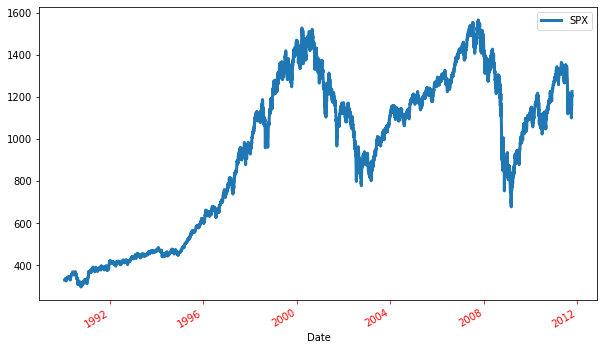

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
data.plot(ax = ax1)
plt.show()

2007-2008년 세계적 금융위기 지점을 아래 내용으로 그래프에 주석으로 추가해보자.

- 2007년 10월 11일: 주가 강세장 위치 'Peak of bull market'
- 2008년 3월 12일: 베어스턴스 투자은행 붕괴 'Bear Stearns Fails'
- 2008년 9월 15일: 레만 투자은행 파산 'Lehman Bankruptcy'

In [ ]:
from datetime import datetime

In [ ]:
data.asof(datetime(2007, 10, 11))

SPX    1554.41
Name: 2007-10-11 00:00:00, dtype: float64

#### `annotate()`

- `xt` 속성: 화살표 머리 위치
- `xytext` 속성: 텍스트 위치
- `arrowprops` 속성: 화살표 속성
- `horizontalalignment`: 텍스트 좌우 줄맞춤
- `verticalalignment`: 텍스트 상하 줄맞춤

Text(0.8, 0.6, 'dd')

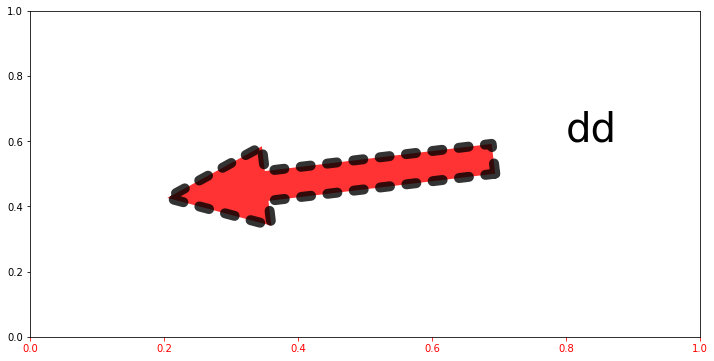

In [ ]:
## 그림 그리기 
# https://frhyme.github.io/python-lib/plt_arrowprops/
plt.figure(figsize=(12, 6))
plt.annotate('dd', ## 텍스트
             
             xy=(0.1, 0.4), ## 화살이 가르킬 위치 
             xytext=(0.8, 0.6), ## 텍스트 위치 
             fontsize=40, ## font 크기 
             arrowprops=dict(facecolor='red', ## 내부 색깔 
                             edgecolor='black', ## 선 색깔 
                             fill=True, ## 내부가 비어짐(fill white와 같은 )
                             shrink=0.15, ## 텍스트로부터 얼마나 떨어진 위치에서 화살표가 시작하는가? 0이 최소 1이 최대  
                             headwidth=80, ## 화살 너비
                             headlength=100, ## 화살 길이 
                             width=30, ## 화살표에서 화살이 아닌 부분의 너비  
                             linewidth=10, ## polygon의 선 
                             linestyle=':', ## 선의 특성 
                             alpha=0.8, ## 투명도, line, fill을 따로 지정할 수 있는지는 모르겠음. 
                             )
            )

In [ ]:
data = pd.read_csv(spx_path, index_col=0, parse_dates = True)
spx = data["SPX"]

In [ ]:
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

In [ ]:
datetime(2007, 1, 1)

datetime.datetime(2007, 1, 1, 0, 0)

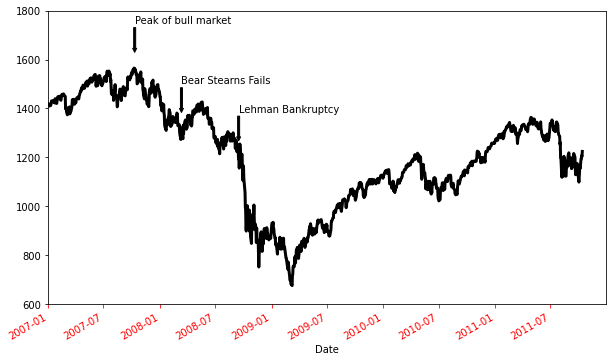

In [ ]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

spx.plot(ax=ax, style='k-')

for date, label in crisis_data:
    ax.annotate(label, 
                xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

ax.set_xlim([datetime(2007, 1, 1), datetime(2011, 12, 31)])
ax.set_ylim([600, 1800])
plt.show()


#### 도형 추가

지정된 함수를 이용하여 다양한 도형을 추가 가능

- `plt.<도형명>((위치), 크기)`
- `plt.Rectangle()`: 직사각형. 왼편 아래 좌표 및 가로 세로 길이
- `plt.Circle()`: 원. 원의 중심 좌표 및 반지름.
- `plt.Polygon()`: 다각형. 각 꼭지점의 좌표.

__주의사항:__
- x, y축의 눈금이 다르면 도형이 정확하게 표현되지 않을 수 있다. 
- 예를 들어, 두 축의 척도가 다르면 원이 타원으로 보일수 있음
    - `Figure` 객체를 생성할 때 두 축의 크기를 동일하게 지정하면 척도가 동일해 진다. 
    - https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Circle.html
    - https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.CirclePolygon.html
    - ...

```
:                +------------------+
:                |                  |
:              height               |
:                |                  |
:               (xy)---- width -----+
```

In [ ]:
import matplotlib.pyplot as plt

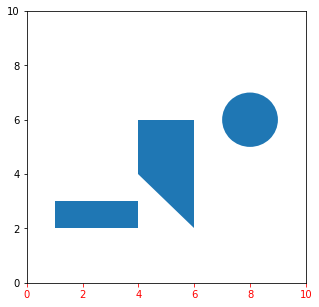

In [ ]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
rect = plt.Rectangle((1, 2), width=3, height=1) #사각형 객체 생성후 
circ = plt.Circle((8,6), 1)

pgon = plt.Polygon(([4,4], [4,6], [6,6], [6,2]))

plt.xlim(0, 10)
plt.ylim(0, 10)
ax.add_patch(rect)# 객체 추가
ax.add_patch(circ)
ax.add_patch(pgon)
plt.show()

In [ ]:
import numpy as np

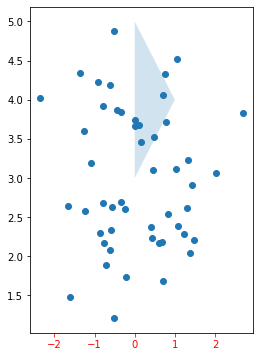

In [ ]:
fig = plt.figure(figsize=(4,6))
ax = fig.add_subplot(1,1,1)

ax.scatter(np.random.randn(50), np.random.randn(50)+3)
pg = plt.Polygon(([0, 3],[1, 4],[0, 5]), alpha=0.2)
ax.add_patch(pg)

plt.show()

### 그래프 저장하기

`plt.savefig()`

- `dpi=100`: 인치당 픽셀 수. 저장된 이미지의 해상도 지정.
- `bbox_inches=tight`: 이미지별 둘레의 공백 지정. 여기서는 공백을 거의 사용하지 말라는 의미임.

In [ ]:
# fig = plt.figure(figsize=(4,6))
ax = fig.add_subplot(1,1,1)

ax.scatter(np.random.randn(50), np.random.randn(50)+3)
pg = plt.Polygon(([0, 3],[1, 4],[0, 5]), alpha=0.2)
ax.add_patch(pg)
plt.savefig("hello.png")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


<Figure size 720x432 with 0 Axes>

### matplotlib 기본 설정

`plt.rc()` 함수를 이용하여 matplot을 이용하여 생성되는 이미지 관련 설정을 전역적으로 지정할 수 있다.
사용되는 형식은 다음과 같다.

- 첫째 인자: 속성 지정
- 둘째 인자: 속성값 지정

__참고:__ 'rc' 는 기본설정을 의미하는 단어로 많이 사용된다. 
풀어 쓰면 "Run at startup and they Configure your stuff", 
즉, "프로그램이 시작할 때 기본값들을 설정한다"의 의미이다.
'.vimrc', '.bashrc', '.zshrc' 등 많은 애플리케이션의 초기설정 파일명에 사용되곤 한다.

아래 코드는 이미지의 사이즈를 지정한다.

In [ ]:
plt.rc('figure', figsize=(10, 10))

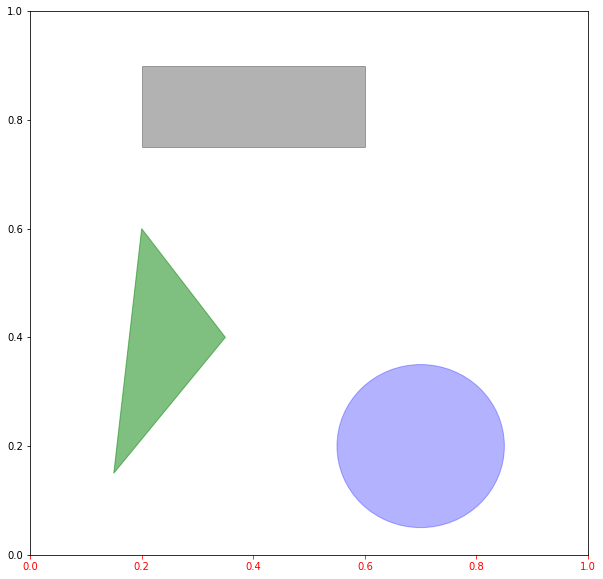

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)
plt.show()

아래 코드는 다양한 속성을 지정하는 방식을 보여준다.

* 이미지 사이즈 지정

In [ ]:
plt.rc("figure", figsize=(10,6))

* 선 속성 지정

In [ ]:
plt.rc("lines", linewidth=3, color="r")

* 텍스트 폰트 속성 지정

In [ ]:
# font_options = {
#     "family":"fontname",
#     "weight" : "bold"
#     "size": "size값"
# }
# plt.rc("font", <font_options>)

* 그래프 구성 요소의 색상 지정

In [ ]:
plt.rcParams["text.color"] = "black"
plt.rcParams["xtick.color"] = "red"

아래 코드는 앞서 설정된 다양한 속성을 반영한 결과를 보여준다.

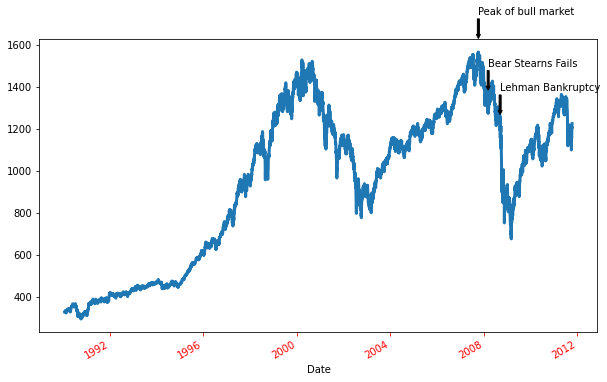

In [ ]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

spx.plot(ax=ax, style='-')

for date, label in crisis_data:
    ax.annotate(label, 
                xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

plt.show()